# Regression: Stock Price Prediction

https://github.com/eliangcs/pystock-data

In [63]:
import pandas as pd
import tarfile
import matplotlib.pyplot as plt

%matplotlib inline

In [30]:
!curl -L -o data.tar.gz https://github.com/eliangcs/pystock-data/raw/gh-pages/2015/0001_initial.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   155  100   155    0     0    148      0  0:00:01  0:00:01 --:--:--   148
100   155  100   155    0     0    148      0  0:00:01  0:00:01 --:--:--   148

 20 40.4M   20 8527k    0     0  4509k      0  0:00:09  0:00:01  0:00:08 4509k
 46 40.4M   46 18.9M    0     0  6696k      0  0:00:06  0:00:02  0:00:04 10.5M
 71 40.4M   71 28.9M    0     0  7607k      0  0:00:05  0:00:03  0:00:02 10.2M
 94 40.4M   94 38.4M    0     0  8047k      0  0:00:05  0:00:04  0:00:01 10.0M
100 40.4M  100 40.4M    0     0  8159k      0  0:00:05  0:00:05 --:--:-- 10.0M


In [31]:
with tarfile.open('data.tar.gz') as tar:
    df_prices = pd.read_csv(tar.extractfile('prices.csv'), parse_dates=True)
    df_reports = pd.read_csv(tar.extractfile('reports.csv'), parse_dates=True)

In [32]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584865 entries, 0 to 2584864
Data columns (total 8 columns):
symbol       object
date         object
open         float64
high         float64
low          float64
close        float64
volume       int64
adj_close    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 157.8+ MB


In [33]:
df_reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61722 entries, 0 to 61721
Data columns (total 20 columns):
symbol           61712 non-null object
end_date         61722 non-null object
amend            61722 non-null bool
period_focus     61722 non-null object
fiscal_year      61722 non-null int64
doc_type         61722 non-null object
revenues         60533 non-null float64
op_income        46971 non-null float64
net_income       61621 non-null float64
eps_basic        60768 non-null float64
eps_diluted      60963 non-null float64
dividend         61722 non-null float64
assets           61673 non-null float64
cur_assets       47996 non-null float64
cur_liab         47821 non-null float64
cash             61635 non-null float64
equity           60519 non-null float64
cash_flow_op     61640 non-null float64
cash_flow_inv    61290 non-null float64
cash_flow_fin    61080 non-null float64
dtypes: bool(1), float64(14), int64(1), object(4)
memory usage: 9.0+ MB


## Find share prices and earnings numbers for related companies

In [51]:
symbols = ['GS', 'JPM', 'MS', 'BAC', 'C', 'WFC']
for s in symbols:
    print(df_reports.loc[df_reports.symbol == s].shape, df_prices.loc[df_prices.symbol == s].shape)

(23, 20) (1564, 8)
(24, 20) (0, 8)
(46, 20) (0, 8)
(23, 20) (1564, 8)
(23, 20) (1564, 8)
(23, 20) (0, 8)


## Plot share prices and revenues

In [55]:
# Convert to datetime
df_prices['date'] = pd.to_datetime(df_prices['date'])

In [57]:
df_prices.loc[df_prices.symbol == 'GS'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1564 entries, 2516746 to 2564614
Data columns (total 8 columns):
symbol       1564 non-null object
date         1564 non-null datetime64[ns]
open         1564 non-null float64
high         1564 non-null float64
low          1564 non-null float64
close        1564 non-null float64
volume       1564 non-null int64
adj_close    1564 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 110.0+ KB


In [58]:
# Convert to datetime
df_reports['end_date'] = pd.to_datetime(df_reports['end_date'])

In [59]:
df_reports.loc[df_reports.symbol == 'GS'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 18871 to 18903
Data columns (total 20 columns):
symbol           23 non-null object
end_date         23 non-null datetime64[ns]
amend            23 non-null bool
period_focus     23 non-null object
fiscal_year      23 non-null int64
doc_type         23 non-null object
revenues         23 non-null float64
op_income        0 non-null float64
net_income       23 non-null float64
eps_basic        23 non-null float64
eps_diluted      23 non-null float64
dividend         23 non-null float64
assets           23 non-null float64
cur_assets       0 non-null float64
cur_liab         0 non-null float64
cash             23 non-null float64
equity           23 non-null float64
cash_flow_op     23 non-null float64
cash_flow_inv    19 non-null float64
cash_flow_fin    23 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(14), int64(1), object(3)
memory usage: 3.6+ KB


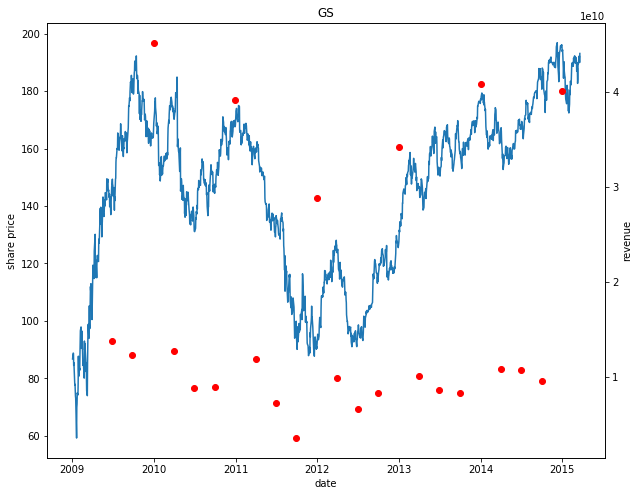

In [84]:
fig, ax = plt.subplots(figsize=(10, 8))

symbol = 'GS'
ax.plot(df_prices.loc[df_prices.symbol == symbol, 'date'],
        df_prices.loc[df_prices.symbol == symbol, 'close'])
ax.set(xlabel='date', ylabel='share price', title=symbol)

ax1 = ax.twinx() # instantiate a second axes that shares the same x-axis
ax1.scatter(df_reports.loc[df_reports.symbol == symbol, 'end_date'].values,
            df_reports.loc[df_reports.symbol == symbol, 'revenues'].values, color='red')
ax1.set(ylabel='revenue')
ax1.tick_params(axis='y')

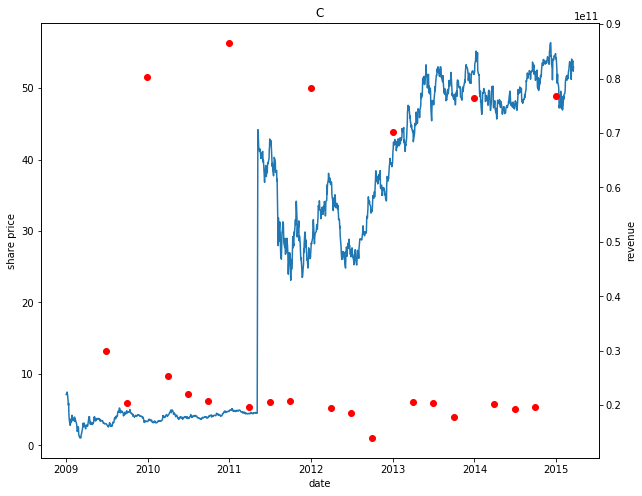

In [85]:
fig, ax = plt.subplots(figsize=(10, 8))

symbol = 'C'
ax.plot(df_prices.loc[df_prices.symbol == symbol, 'date'],
        df_prices.loc[df_prices.symbol == symbol, 'close'])
ax.set(xlabel='date', ylabel='share price', title=symbol)

ax1 = ax.twinx() # instantiate a second axes that shares the same x-axis
ax1.scatter(df_reports.loc[df_reports.symbol == symbol, 'end_date'].values,
            df_reports.loc[df_reports.symbol == symbol, 'revenues'].values, color='red')
ax1.set(ylabel='revenue')
ax1.tick_params(axis='y') 

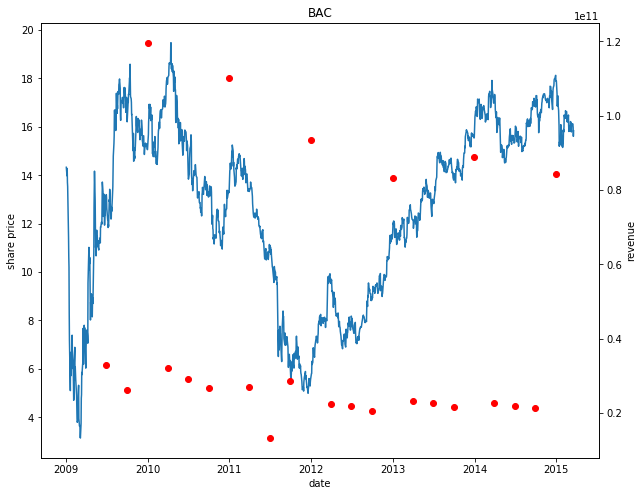

In [86]:
fig, ax = plt.subplots(figsize=(10, 8))

symbol = 'BAC'
ax.plot(df_prices.loc[df_prices.symbol == symbol, 'date'],
        df_prices.loc[df_prices.symbol == symbol, 'close'])
ax.set(xlabel='date', ylabel='share price', title=symbol)

ax1 = ax.twinx() # instantiate a second axes that shares the same x-axis
ax1.scatter(df_reports.loc[df_reports.symbol == symbol, 'end_date'].values,
            df_reports.loc[df_reports.symbol == symbol, 'revenues'].values, color='red')
ax1.set(ylabel='revenue')
ax1.tick_params(axis='y')

## Observations

Not much correlation seen between revenue and share prices.

However, the share prices seem to be quite correlated with one another.

Let's see if we can build a regression model to predict Goldman Sach's share prices from others.